# "Big Data Analytics" [CN7031] CRWK 2020-21

# SPARK INITIATION THROUGH COLAB

In [1]:
# MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# UPDATING AND DOWNLOADING THE REQUIRED PACKAGES
!sudo apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://mirrors.estointernet.in/apache/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,165 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:13 https://developer.download.

In [3]:
# CONFIGURING THE JAVA AND SPARK PATH
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-3.1.1-bin-hadoop3.2"
# IDENTIFYING SPARK
import findspark
findspark.init()

In [4]:
# STARTING A PYSPARK SESSION
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Group ID G 15').getOrCreate()

In [5]:
# IMPORTING INDIVIDUAL DATA FILES OF THE DATASET
data_frame_01 = spark.read.load("/content/drive/MyDrive/data/02_14_2018.csv", format="csv", inferSchema=True, header=True)
data_frame_02 = spark.read.load("/content/drive/MyDrive/data/02_15_2018.csv", format="csv", inferSchema=True, header=True)
data_frame_03 = spark.read.load("/content/drive/MyDrive/data/02_16_2018.csv", format="csv", inferSchema=True, header=True)
data_frame_04 = spark.read.load("/content/drive/MyDrive/data/02_21_2018.csv", format="csv", inferSchema=True, header=True)
data_frame_05 = spark.read.load("/content/drive/MyDrive/data/02_22_2018.csv", format="csv", inferSchema=True, header=True)
data_frame_06 = spark.read.load("/content/drive/MyDrive/data/02_23_2018.csv", format="csv", inferSchema=True, header=True)
data_frame_07 = spark.read.load("/content/drive/MyDrive/data/02_28_2018.csv", format="csv", inferSchema=True, header=True)
data_frame_08 = spark.read.load("/content/drive/MyDrive/data/03_01_2018.csv", format="csv", inferSchema=True, header=True)
data_frame_09 = spark.read.load("/content/drive/MyDrive/data/03_02_2018.csv", format="csv", inferSchema=True, header=True)

In [6]:
# DATA FRAME CREATION
from pyspark.sql import DataFrame
all_data_frames = [data_frame_01, data_frame_02, data_frame_03, data_frame_04, data_frame_05, data_frame_06, data_frame_07, data_frame_08, data_frame_09]

In [7]:
# COMBINING ALL THE DATA FRAMES
from functools import reduce
dataframeunion = reduce(DataFrame.unionAll, all_data_frames)

In [8]:
# VERIFYING THE CREATED DATAFRAME
dataframeunion 

DataFrame[Dst Port: int, Protocol: int, Timestamp: string, Flow Duration: bigint, Tot Fwd Pkts: int, Tot Bwd Pkts: int, TotLen Fwd Pkts: int, TotLen Bwd Pkts: double, Fwd Pkt Len Max: int, Fwd Pkt Len Min: int, Fwd Pkt Len Mean: double, Fwd Pkt Len Std: double, Bwd Pkt Len Max: int, Bwd Pkt Len Min: int, Bwd Pkt Len Mean: double, Bwd Pkt Len Std: double, Flow Byts/s: double, Flow Pkts/s: double, Flow IAT Mean: double, Flow IAT Std: double, Flow IAT Max: double, Flow IAT Min: double, Fwd IAT Tot: double, Fwd IAT Mean: double, Fwd IAT Std: double, Fwd IAT Max: double, Fwd IAT Min: double, Bwd IAT Tot: double, Bwd IAT Mean: double, Bwd IAT Std: double, Bwd IAT Max: double, Bwd IAT Min: double, Fwd PSH Flags: int, Bwd PSH Flags: int, Fwd URG Flags: int, Bwd URG Flags: int, Fwd Header Len: int, Bwd Header Len: int, Fwd Pkts/s: double, Bwd Pkts/s: double, Pkt Len Min: int, Pkt Len Max: int, Pkt Len Mean: double, Pkt Len Std: double, Pkt Len Var: double, FIN Flag Cnt: int, SYN Flag Cnt: int, 

In [9]:
dataframeunion.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Flow Duration: long (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: double (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: double (nullable = true)
 |-- Flow IAT Min: double (nullable = true)

# **PySpark QUERIES** -- **TASK 1**







In [10]:
# SPARK VIEW CREATION
from pyspark.sql import functions as F
# ELIMINATING WHITE SPACES IN THE ATTRIBUTE NAMES
dataframeunion = dataframeunion.select([F.col(col).alias(col.replace(' ', '').replace('/','_')) for col in dataframeunion.columns])
dataframeunion.createOrReplaceTempView('dataframeunion')

In [11]:
# PRINTING THE MODIFIED SCHEMA OF THE DATASET
dataframeunion.printSchema()

root
 |-- DstPort: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- FlowDuration: long (nullable = true)
 |-- TotFwdPkts: integer (nullable = true)
 |-- TotBwdPkts: integer (nullable = true)
 |-- TotLenFwdPkts: integer (nullable = true)
 |-- TotLenBwdPkts: double (nullable = true)
 |-- FwdPktLenMax: integer (nullable = true)
 |-- FwdPktLenMin: integer (nullable = true)
 |-- FwdPktLenMean: double (nullable = true)
 |-- FwdPktLenStd: double (nullable = true)
 |-- BwdPktLenMax: integer (nullable = true)
 |-- BwdPktLenMin: integer (nullable = true)
 |-- BwdPktLenMean: double (nullable = true)
 |-- BwdPktLenStd: double (nullable = true)
 |-- FlowByts_s: double (nullable = true)
 |-- FlowPkts_s: double (nullable = true)
 |-- FlowIATMean: double (nullable = true)
 |-- FlowIATStd: double (nullable = true)
 |-- FlowIATMax: double (nullable = true)
 |-- FlowIATMin: double (nullable = true)
 |-- FwdIATTot: double (nullable = true)
 |

In [12]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set,sum,avg,max,countDistinct,count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness 
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance,var_samp,  var_pop

In [13]:
#QUERY@1 -- IMPLEMENTING GROUPBY & ORDERBY
dataframeunion.select('Timestamp').groupBy('Timestamp').count().orderBy('count', ascending=True).show()
'''#Graphically representing the above query
query1_1 = query1.toPandas()
query1_1.plot.bar (x='Timestamp',y='count',figsize=(10,5))'''

+-------------------+-----+
|          Timestamp|count|
+-------------------+-----+
|21/02/2018 10:38:44|    1|
|14/02/2018 05:18:08|    1|
|14/02/2018 04:06:58|    1|
|14/02/2018 05:10:38|    1|
|14/02/2018 05:29:50|    1|
|15/02/2018 05:34:32|    1|
|16/02/2018 01:03:50|    1|
|21/02/2018 10:11:48|    1|
|21/02/2018 10:36:21|    1|
|14/02/2018 05:01:58|    1|
|21/02/2018 10:40:34|    1|
|21/02/2018 09:00:07|    1|
|21/02/2018 10:14:38|    1|
|21/02/2018 09:03:35|    1|
|28/02/2018 05:39:37|    1|
|28/02/2018 05:32:08|    1|
|28/02/2018 09:01:33|    1|
|28/02/2018 02:48:25|    1|
|28/02/2018 12:14:11|    1|
|28/02/2018 02:59:02|    1|
+-------------------+-----+
only showing top 20 rows



"#Graphically representing the above query\nquery1_1 = query1.toPandas()\nquery1_1.plot.bar (x='Timestamp',y='count',figsize=(10,5))"

In [14]:
# QUERY@2 -- IMPLEMENTING THE DROP CONCEPT
dataframeunion.na.drop(how="any").show(truncate=False)

+-------+--------+-------------------+------------+----------+----------+-------------+-------------+------------+------------+-------------+--------------+------------+------------+--------------+--------------+---------------+-------------+----------------+----------------+-----------+-----------+------------+----------------+----------------+-----------+-----------+---------+----------------+----------------+---------+---------+-----------+-----------+-----------+-----------+------------+------------+-------------+------------+---------+---------+--------------+--------------+----------------+----------+----------+----------+----------+----------+----------+------------+----------+------------+--------------+-------------+--------------+------------+------------+-------------+------------+------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+----------+---------+---------+---------+----------

In [15]:
#QUERY@3 -- IMPLEMENTING THE COUNT DISTINCT
df2 = dataframeunion.select(countDistinct("DstPort", "Label"))
df2.show(truncate=False)
print("Distinct Count of DstPort &amp; Label: "+str(df2.collect()[0][0]))

+------------------------------+
|count(DISTINCT DstPort, Label)|
+------------------------------+
|73892                         |
+------------------------------+

Distinct Count of DstPort &amp; Label: 73892


In [16]:
#QUERY@4 -- IMPLEMNTING THE COUNT W.R.T. A ROW
print("count: "+str(dataframeunion.select(count("FwdHeaderLen")).collect()[0]))

count: Row(count(FwdHeaderLen)=8284191)


In [17]:
#QUERY@5 -- IMPLEMENTING WHERE CLAUSE
dataframeunion.where(~dataframeunion['FwdPkts_s'].like('Down_UpRatio'))[['FwdPkts_s']]\
.show()

+-------------+
|    FwdPkts_s|
+-------------+
| 0.0266331163|
| 0.0266331761|
| 0.0266338483|
| 2.3241523119|
| 1.5901743581|
| 2.2892000834|
| 0.0266334092|
| 0.0266332286|
|10.4928931635|
| 10.525252185|
|10.5279559342|
|10.4718401746|
| 9.7511886699|
|10.4885349824|
| 10.490625577|
|10.4786434767|
| 10.533633893|
|10.4908016651|
|10.4329899489|
|10.5049299636|
+-------------+
only showing top 20 rows



In [18]:
#QUERY@6 IMPLEMENTING FILTER
dataframeunion.filter( (dataframeunion.Protocol  == "6") | (dataframeunion.DstPort  == "80") ) \
    .show(truncate=False)  

+-------+--------+-------------------+------------+----------+----------+-------------+-------------+------------+------------+-------------+--------------+------------+------------+--------------+--------------+---------------+-------------+----------------+----------------+----------+----------+---------+----------------+----------------+---------+---------+---------+----------------+----------------+---------+---------+-----------+-----------+-----------+-----------+------------+------------+-------------+------------+---------+---------+--------------+--------------+----------------+----------+----------+----------+----------+----------+----------+------------+----------+------------+--------------+-------------+--------------+------------+------------+-------------+------------+------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+----------+---------+---------+---------+--------+-------+--

In [19]:
#QUERY@7 -- IMPLEMENTING COL & LIT
from pyspark.sql.functions import col,lit
df2 = dataframeunion.select(col("BwdIATMean"),col("FlowDuration"),lit("1").alias("lit_value1"))
df2.show(truncate=False)

+----------------+------------+----------+
|BwdIATMean      |FlowDuration|lit_value1|
+----------------+------------+----------+
|0.0             |112641719   |1         |
|0.0             |112641466   |1         |
|0.0             |112638623   |1         |
|626433.555555556|6453966     |1         |
|771548.1        |8804066     |1         |
|543690.727272727|6989341     |1         |
|0.0             |112640480   |1         |
|0.0             |112641244   |1         |
|119317.0        |476513      |1         |
|118758.0        |475048      |1         |
|118866.0        |474926      |1         |
|119443.5        |477471      |1         |
|128281.5        |512758      |1         |
|119016.5        |476711      |1         |
|118830.0        |476616      |1         |
|119309.0        |477161      |1         |
|118496.0        |474670      |1         |
|119221.0        |476608      |1         |
|119619.0        |479249      |1         |
|118957.5        |475967      |1         |
+----------

In [20]:
#QUERY@8 -- IMPLEMENTING GROUPBY AND COUNT W.R.T. TIME()
from time import time

t0 = time()
dataframeunion.select("Protocol", "FlowDuration", "DstPort").groupBy("Protocol").count().show()

+--------+-------+
|Protocol|  count|
+--------+-------+
|    null|     46|
|       6|6504689|
|      17|1685321|
|       0|  94181|
+--------+-------+



# **PySpark -- PART 1 / TASK 2**

In [21]:
#QUERY@9 -- IMPLEMENTING VARIANCE
dataframeunion.select(variance("FwdIATTot"),var_samp("FlowByts_s"),var_pop("FwdPkts_s")) \
  .show(truncate=False)

+---------------------+--------------------+--------------------+
|var_samp(FwdIATTot)  |var_samp(FlowByts_s)|var_pop(FwdPkts_s)  |
+---------------------+--------------------+--------------------+
|4.7719365470912826E17|NaN                 |4.423381798211515E10|
+---------------------+--------------------+--------------------+



In [22]:
#QUERY@10 -- IMPLEMENTING STANDARD DEVIATION
dataframeunion.select(stddev("FwdIATTot"), stddev_samp("FlowByts_s"), \
    stddev_pop("FwdPkts_s")).show(truncate=False)

+----------------------+-----------------------+---------------------+
|stddev_samp(FwdIATTot)|stddev_samp(FlowByts_s)|stddev_pop(FwdPkts_s)|
+----------------------+-----------------------+---------------------+
|6.90792048817246E8    |NaN                    |210318.37290668438   |
+----------------------+-----------------------+---------------------+



In [23]:
#QUERY@11 -- IMPLEMENTING SUMDISTINCT
dataframeunion.select(sum("Down_UpRatio")).show(truncate=False)
dataframeunion.select(sumDistinct("Down_UpRatio")).show(truncate=False)

+-----------------+
|sum(Down_UpRatio)|
+-----------------+
|3778303          |
+-----------------+

+--------------------------+
|sum(DISTINCT Down_UpRatio)|
+--------------------------+
|7560                      |
+--------------------------+



In [24]:
#QUERY@12 -- IMPLEMENTING KURTOSIS
dataframeunion.select(kurtosis("FwdIATTot")).show(truncate=False)

+-------------------+
|kurtosis(FwdIATTot)|
+-------------------+
|1113249.5317189314 |
+-------------------+



In [25]:
#QUERY@13 -- IMPLMENTING MIN,MAX,MEAN
dataframeunion.select(max("BwdHeaderLen")).show(truncate=False)
dataframeunion.select(min("BwdHeaderLen")).show(truncate=False)
dataframeunion.select(mean("BwdHeaderLen")).show(truncate=False)

+-----------------+
|max(BwdHeaderLen)|
+-----------------+
|2462372          |
+-----------------+

+-----------------+
|min(BwdHeaderLen)|
+-----------------+
|0                |
+-----------------+

+------------------+
|avg(BwdHeaderLen) |
+------------------+
|128.01854375400083|
+------------------+



In [26]:
#QUERY@14 IMPLEMENTING SKEWNESS
dataframeunion.select(skewness("FlowDuration")).show(truncate=False)

+----------------------+
|skewness(FlowDuration)|
+----------------------+
|-1028.2663045071208   |
+----------------------+



In [27]:
#QUERY@15 -- IMPLEMENTING SUMMARY USING DESCRIBE
dataframeunion.select(['FwdIATMean', 'PktLenVar', 'PktSizeAvg', 'FwdBlkRateAvg',
           'Label']).describe().show()

+-------+--------------------+-----------------+------------------+--------------------+--------------+
|summary|          FwdIATMean|        PktLenVar|        PktSizeAvg|       FwdBlkRateAvg|         Label|
+-------+--------------------+-----------------+------------------+--------------------+--------------+
|  count|             8284191|          8284191|           8284191|             8284191|       8284237|
|   mean|  3804538.5803629374| 40349.5312308883|  85.1619427816869|                 0.0|           0.0|
| stddev|3.1187593210394305E8|205237.3372746219|109.73722578951173|                 0.0|          null|
|    min|          -8.2822E11|              0.0|               0.0|                   0|             0|
|    max|               1.2E8|           5.19E8|       17478.40769|0M M M M M M M M ...|SSH-Bruteforce|
+-------+--------------------+-----------------+------------------+--------------------+--------------+



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

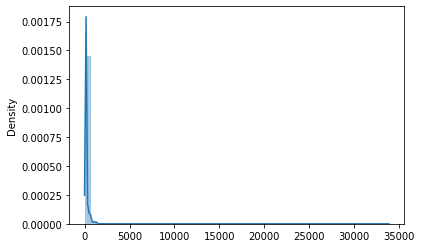

In [30]:
#QUERY@16 -- IMPLEMENTING SAMPLE()
sample_df = dataframeunion.select(['BwdSegSizeAvg']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
import seaborn as sns
sns.distplot(pandas_df)
plt.xlabel('BwdSegSizeAvg') 
plt.show()

# **PySpark -- PART 2 / TASK 2**

# DecisionTreeClassifier

In [34]:
#import SparkSession
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('decision_tree').getOrCreate()
df = spark.read.csv('/content/drive/MyDrive/data/02_14_2018.csv', inferSchema=True, header=True)
df.show(3)

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+------------+-------------+--------------+------------+------------+-----------+------------+--------------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+------------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+

In [35]:
from pyspark.ml.feature import VectorAssembler

In [36]:
df_assembler = VectorAssembler(inputCols=['Dst Port', 'Protocol', 'Tot Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max'], outputCol="features")
df = df_assembler.transform(df)

In [37]:
df.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Flow Duration: long (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: integer (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: long (nullable = true)
 |-- Flow IAT Min: long (nullable = true)
 |

In [38]:
df.select(['features','Down/Up Ratio']).show(10,False)

+----------------------------+-------------+
|features                    |Down/Up Ratio|
+----------------------------+-------------+
|(5,[2],[3.0])               |0            |
|(5,[2],[3.0])               |0            |
|(5,[2],[3.0])               |0            |
|[22.0,6.0,15.0,2273.0,744.0]|0            |
|[22.0,6.0,14.0,2209.0,744.0]|0            |
|[22.0,6.0,16.0,2273.0,744.0]|0            |
|(5,[2],[3.0])               |0            |
|(5,[2],[3.0])               |0            |
|[80.0,6.0,5.0,463.0,211.0]  |0            |
|[80.0,6.0,5.0,472.0,220.0]  |0            |
+----------------------------+-------------+
only showing top 10 rows



In [39]:
#select data for building model
model_df=df.select(['features','Down/Up Ratio'])

In [40]:
from pyspark.ml.classification import DecisionTreeClassifier

In [41]:
train_df,test_df=model_df.randomSplit([0.75,0.25])

In [42]:
train_df.count()

786485

In [43]:
train_df.groupBy('Down/Up Ratio').count().show()

+-------------+------+
|Down/Up Ratio| count|
+-------------+------+
|           78|     1|
|           26|     1|
|           12|    13|
|            1|506037|
|           13|     5|
|            6|   190|
|           16|    13|
|            3|   651|
|           20|     4|
|           57|     1|
|            5|    49|
|           19|     5|
|           64|     1|
|           15|     2|
|           61|     1|
|            9|    24|
|           17|     4|
|            4|   447|
|            8|    28|
|            7|    18|
+-------------+------+
only showing top 20 rows



In [44]:
test_df.groupBy('Down/Up Ratio').count().show()

+-------------+------+
|Down/Up Ratio| count|
+-------------+------+
|           12|     1|
|            1|168591|
|           13|     2|
|            6|    51|
|           16|     5|
|            3|   236|
|           20|     2|
|            5|    13|
|           15|     1|
|            9|     4|
|            4|   129|
|            8|     2|
|            7|     9|
|           10|    20|
|           70|     1|
|           11|     7|
|           33|     1|
|            2|  1478|
|            0| 91537|
+-------------+------+



In [45]:
dt_classifier=DecisionTreeClassifier(labelCol='Down/Up Ratio').fit(train_df)

In [46]:
dt_classifier

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_63d1b21f6806, depth=5, numNodes=47, numClasses=81, numFeatures=5

In [47]:
predictions=dt_classifier.transform(test_df)

In [48]:
predictions.show(10,False)

+-------------+-------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
|features     |Down/Up Ratio|rawPrediction                                                                                                                                                                            

In [49]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [50]:
accuracy=MulticlassClassificationEvaluator(labelCol='Down/Up Ratio',metricName='accuracy').evaluate(predictions)

In [51]:
accuracy

0.9262467091457133

In [52]:
accuracy=MulticlassClassificationEvaluator(labelCol='Down/Up Ratio',metricName='f1').evaluate(predictions)

In [53]:
accuracy

0.9226771828191753

In [54]:
precision=MulticlassClassificationEvaluator(labelCol='Down/Up Ratio',metricName='weightedPrecision').evaluate(predictions)

In [55]:
precision

0.9268232817833071

In [56]:
recall=MulticlassClassificationEvaluator(labelCol='Down/Up Ratio',metricName='weightedRecall').evaluate(predictions)

In [57]:
recall

0.9262467091457134

# LinearRegression

In [58]:
#create sparksession object
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('lin_reg').getOrCreate()

In [59]:
#import Linear Regression from spark's MLlib
from pyspark.ml.regression import LinearRegression

In [60]:
#Load the dataset
df=spark.read.csv('/content/drive/MyDrive/data/02_14_2018.csv',inferSchema=True,header=True)

In [61]:
#validate the size of data
print((df.count(), len(df.columns)))

(1048575, 80)


In [62]:
#explore the data
df.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Flow Duration: long (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: integer (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: long (nullable = true)
 |-- Flow IAT Min: long (nullable = true)
 |

In [63]:
#import vectorassembler to create dense vectors
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [64]:
#create the vector assembler 
vec_assmebler=VectorAssembler(inputCols=['Dst Port', 'Protocol', 'Tot Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max'],outputCol='features')

In [65]:
#transform the values
features_df=vec_assmebler.transform(df)

In [66]:
#validate the presence of dense vectors 
features_df.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Flow Duration: long (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: integer (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: long (nullable = true)
 |-- Flow IAT Min: long (nullable = true)
 |

In [67]:
#view the details of dense vector
features_df.select('features').show(1,False)

+-------------+
|features     |
+-------------+
|(5,[2],[3.0])|
+-------------+
only showing top 1 row



In [68]:
#create data containing input features and output column
model_df=features_df.select('features','Down/Up Ratio')

In [69]:
model_df.show(3)

+-------------+-------------+
|     features|Down/Up Ratio|
+-------------+-------------+
|(5,[2],[3.0])|            0|
|(5,[2],[3.0])|            0|
|(5,[2],[3.0])|            0|
+-------------+-------------+
only showing top 3 rows



In [70]:
#size of model df
print((model_df.count(), len(model_df.columns)))

(1048575, 2)


In [71]:
#split the data into 70/30 ratio for train test purpose
train_df,test_df=model_df.randomSplit([0.7,0.3])

In [72]:
print((train_df.count(), len(train_df.columns)))

(733532, 2)


In [73]:
print((test_df.count(), len(test_df.columns)))

(315043, 2)


In [74]:
train_df.describe().show()

+-------+------------------+
|summary|     Down/Up Ratio|
+-------+------------------+
|  count|            733532|
|   mean|0.6633084855193775|
| stddev|0.5599861581491731|
|    min|                 0|
|    max|                80|
+-------+------------------+



In [75]:
#Build Linear Regression model 
lin_Reg=LinearRegression(labelCol='Down/Up Ratio')

In [76]:
#fit the linear regression model on training data set 
lr_model=lin_Reg.fit(train_df)

In [77]:
lr_model.intercept

0.5807377678976476

In [78]:
print(lr_model.coefficients)

[-7.872672703019911e-06,0.024465375482845334,-0.00353136129102735,1.3675926146314173e-06,-0.0003529217780114114]


In [79]:
training_predictions=lr_model.evaluate(train_df)

In [80]:
training_predictions.meanSquaredError

0.25750707354139585

In [81]:
training_predictions.r2

0.1788260363805546

In [82]:
#make predictions on test data 
test_results=lr_model.evaluate(test_df)

In [83]:
#view the residual errors based on predictions 
test_results.residuals.show(10)

+-------------------+
|          residuals|
+-------------------+
|0.42279359339337974|
|0.42279359339337974|
|0.42279359339337974|
|0.42279359339337974|
| -0.573675045315593|
| -0.573675045315593|
| -0.573675045315593|
| -0.573675045315593|
| -0.573675045315593|
| -0.573675045315593|
+-------------------+
only showing top 10 rows



In [84]:
#coefficient of determination value for model
test_results.r2

0.16233945325960542

In [85]:
test_results.rootMeanSquaredError

0.5284846074633018

In [86]:
test_results.meanSquaredError

0.2792959803256402